# Load database

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [2]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
clientes_path = os.getenv('CLIENTES_CSV')

In [3]:
# Carregar o CSV em um DataFrame Pandas
df_clientes = pd.read_csv(clientes_path)

# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df_clientes.head()


,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838


**Análise inicial do Dataframe**

In [64]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_cliente      998 non-null    int64 
 1   primeiro_nome    998 non-null    object
 2   ultimo_nome      998 non-null    object
 3   email            998 non-null    object
 4   tipo_cliente     998 non-null    object
 5   data_inclusao    998 non-null    object
 6   cpfcnpj          998 non-null    object
 7   data_nascimento  998 non-null    object
 8   endereco         998 non-null    object
 9   cep              998 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB


In [65]:
df_clientes.describe()

,cod_cliente
count,998.000000
mean,499.971944
std,288.674061
min,1.000000
25%,250.250000
50%,499.500000
75%,749.750000
max,999.000000


**Verificar dados faltantes**

In [66]:
df_clientes.isna().any()

cod_cliente        False
primeiro_nome      False
ultimo_nome        False
email              False
tipo_cliente       False
data_inclusao      False
cpfcnpj            False
data_nascimento    False
endereco           False
cep                False
dtype: bool

Vamos selecionar somente os dados categóricos, pois nesta base de dados somente o cod_cliente é do tipo numérico.

In [67]:
df_clientes.select_dtypes("object").describe().transpose()

,count,unique,top,freq
primeiro_nome,998,202,Clara,13
ultimo_nome,998,70,Cardoso,26
email,998,994,thomasbarbosa@example.com,2
tipo_cliente,998,1,PF,998
data_inclusao,998,997,2021-08-23 12:15:00 UTC,2
cpfcnpj,998,998,357.081.496-39,1
data_nascimento,998,975,1961-11-13,3
endereco,998,998,Praia de Duarte Vila Piratininga 81327-166 Fer...,1
cep,998,998,95140-704,1


Podemos observar que todos os clientes são PF. Temos que verificar a repetição do email thomasbarbosa@example.com.

# Visualizações por gráficos

**Histograma de Idade**

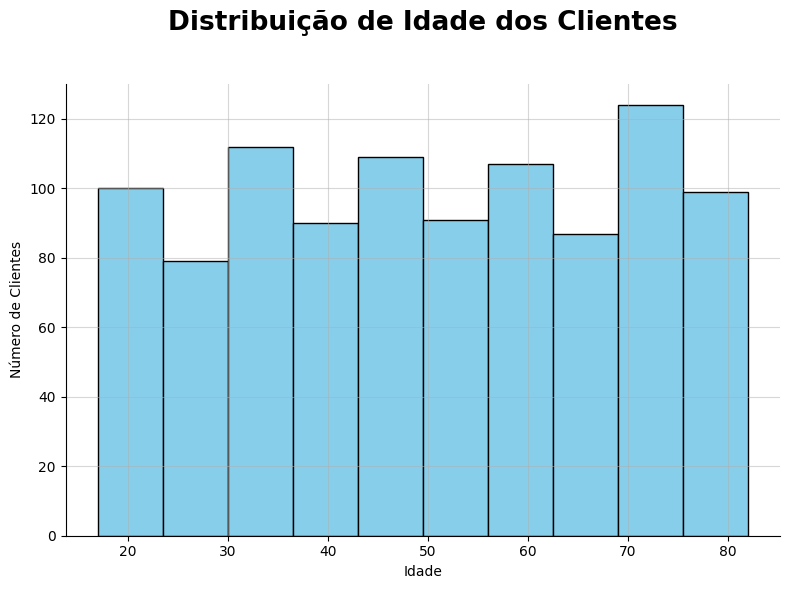

In [81]:
# Calcular idade a partir da data de nascimento
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'])
ano_atual = datetime.now().year
df_clientes['idade'] = ano_atual - df_clientes['data_nascimento'].dt.year

# Plotar histograma de idade
plt.figure(figsize=(8, 6))
plt.hist(df_clientes['idade'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade dos Clientes', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Análise de Inclusão de Clientes ao Longo do Tempo**

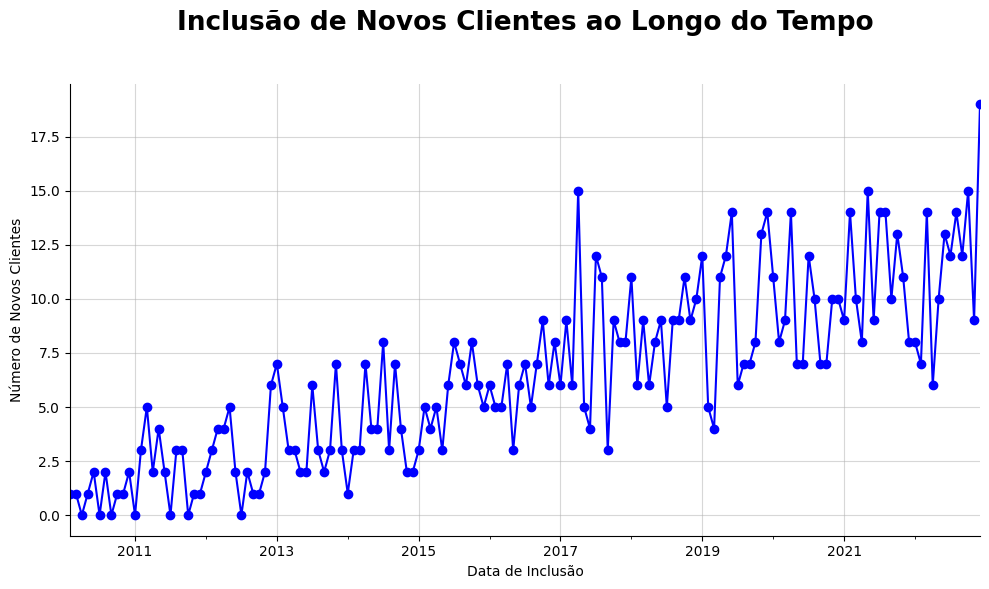

In [82]:
# Converter data_inclusao para tipo datetime
df_clientes['data_inclusao'] = pd.to_datetime(df_clientes['data_inclusao'])

# Agrupar por mês/ano e contar novos clientes por período
novos_clientes_por_mes = df_clientes.resample('M', on='data_inclusao')['cod_cliente'].count()

# Plotar gráfico de linha
plt.figure(figsize=(10, 6))
novos_clientes_por_mes.plot(marker='o', linestyle='-', color='blue')
plt.title('Inclusão de Novos Clientes ao Longo do Tempo', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Data de Inclusão')
plt.ylabel('Número de Novos Clientes')
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()